# Neural Networks for stock price prediction.

Download the data from this [link](https://drive.google.com/file/d/1lLmpOcl6C7GzumtrP66cqKiv38J7WJHX/view?usp=sharing).

Download it and save it as `data.csv`
Upload the sheet in the `Files` tab in the left panel


### Importing libraries

In [ ]:
import os 
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import keras

In [2]:
!pip3 install nbconvert

### Reading the data

In [ ]:
main_dir = '/content'

In [ ]:
data = pd.read_csv(os.path.join(main_dir, 'data.csv'))
data.head()
data = data.dropna()

### Plotting the autocorrelation plot to determine the inputs to be used for forecasting

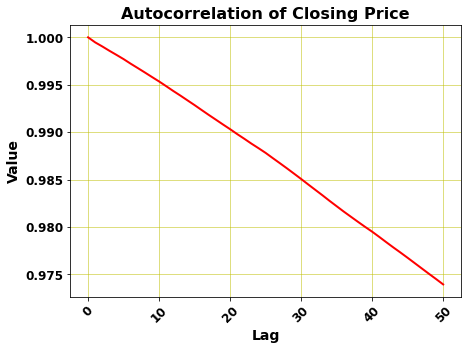

In [ ]:
from statsmodels.tsa import stattools

acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(data['Close'],
                                                             unbiased=True,
                                                             nlags=50,
                                                             qstat=True,
                                                             fft=True,
                                                             alpha = 0.05)

plt.figure(figsize=(7, 5))
plt.plot(pd.Series(acf_djia), color='r', linewidth=2)
plt.title('Autocorrelation of Closing Price', weight='bold', fontsize=16)
plt.xlabel('Lag', weight='bold', fontsize=14)
plt.ylabel('Value', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)

### Visualising the data

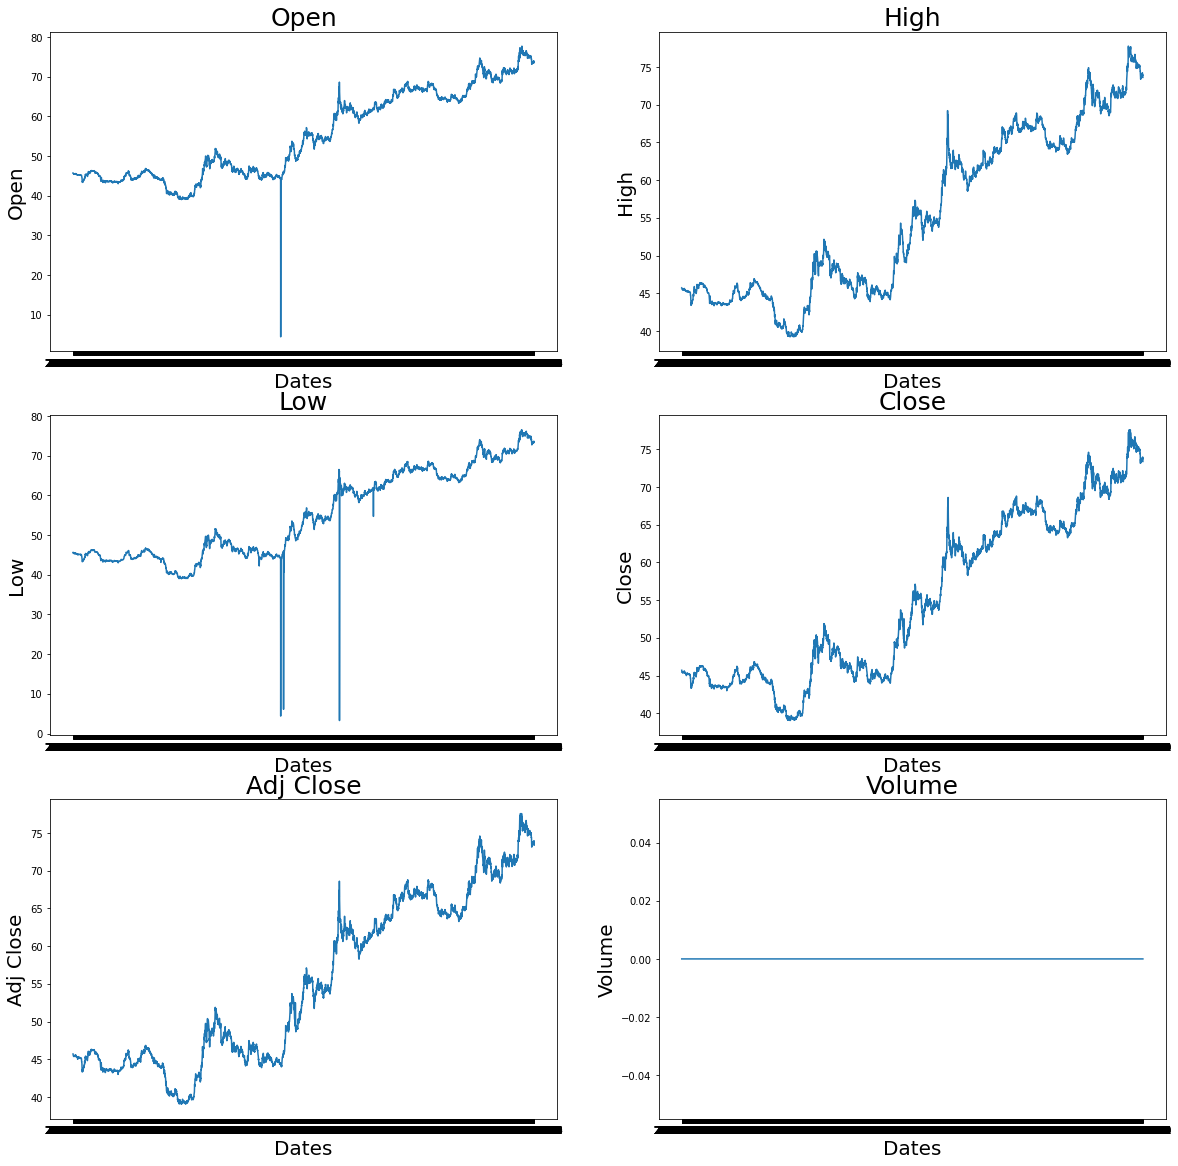

In [ ]:
col_names = [['Open' , 'High'], ['Low', 'Close'], ['Adj Close', 'Volume']]
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

for row in range(3):
    for col in range(2):
        axs[row][col].plot( data['Date'], data[col_names[row][col]])
        axs[row][col].set_title(col_names[row][col], fontsize=25)
        axs[row][col].set_xlabel('Dates', fontsize=20)
        axs[row][col].set_ylabel(col_names[row][col], fontsize=20)
fig.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

### Splitting the data to train and test data

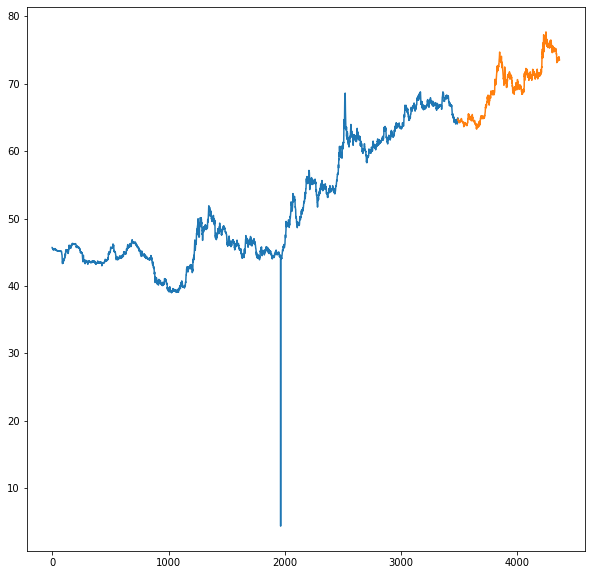

In [ ]:
plt.figure(figsize=(10,10))
train = pd.Series(train_data_array[:,0], index = list(range(train_data_array.shape[0])))
plt.plot(train)
test= pd.Series(test_data_array[:,0], index=list(range(train_data_array.shape[0], train_data_array.shape[0] + test_data_array.shape[0])))
plt.plot(test)
plt.show()

In [ ]:
close = data['Close'].to_numpy().reshape(-1,1)

data_array = close

train_size = int(0.8 * data_array.shape[0] ) 

train_data_array = data_array[:train_size]
print(train_data_array.shape)

test_data_array = data_array[train_size:]
print(test_data_array.shape)

(3489, 1)
(873, 1)


### Creating a model and training it

X train shape (1, 20)
Y train shape (1,)
Training
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
3469/3469 [==============================] - 5s 1ms/step - loss: 4.0677
Epoch 2/15
3469/3469 [==============================] - 5s 1ms/step - loss: 0.9330
Epoch 3/15
3469/3469 [==============================] - 5s 1ms/step - loss: 0.7676
Epoc

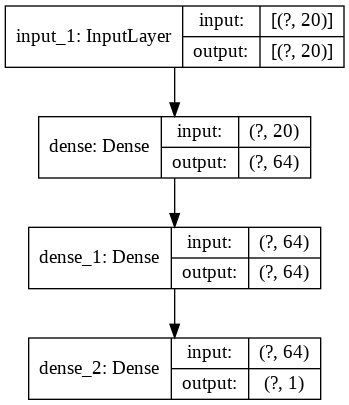

In [ ]:
inputs = 20
train_tsg = keras.preprocessing.sequence.TimeseriesGenerator(train_data_array[:,0], train_data_array[:,0], length = inputs, batch_size= 1 ) 
test_tsg = keras.preprocessing.sequence.TimeseriesGenerator(test_data_array[:,0], test_data_array[:,0], length = inputs , batch_size=1 ) 
print("X train shape", train_tsg[0][0].shape)
print("Y train shape", train_tsg[0][1].shape)

def create_model_single(timesteps, features):
    m = keras.models.Sequential()
    m.add(keras.Input(shape=timesteps))
    m.add(keras.layers.Dense(64, activation='relu'))
    m.add(keras.layers.Dense(64, activation='relu'))
    m.add(keras.layers.Dense(features))
    return m

m = create_model_single(inputs, 1)

print('Training')
m.compile(optimizer='adam', loss='mse')
print(m.summary()) 
h = m.fit_generator(generator = train_tsg,
            epochs=15, verbose=1)
scores = m.evaluate_generator(test_tsg)
print("Test scores", scores)

keras.utils.plot_model(m, show_shapes=True)


### Saving the model

In [ ]:
m.save(os.path.join(main_dir, 'version_20IP_onlyclose.h5'))

### Loading the model

In [ ]:
from keras.models import load_model

m = load_model( '/content/drive/My Drive/DA Project/version_15IP_onlyclose.h5' )

### Testing the model

In [ ]:
train_len = 0

model = m
inputs = 20
actual_data = []
predicted_data = []
print(data_array.shape[0])
while train_len + inputs < data_array.shape[0] :
    print(train_len)
    input_data = data_array[train_len : train_len + inputs, 0]
    input_data = np.expand_dims(input_data, axis=0)
    train_len += 1
    test_results = []
    test_results = model.predict(input_data)
    predicted_data.append(test_results[0][0])
 

In [ ]:
print(len(data['Close']))
print(len(predicted_data))

4362
4342


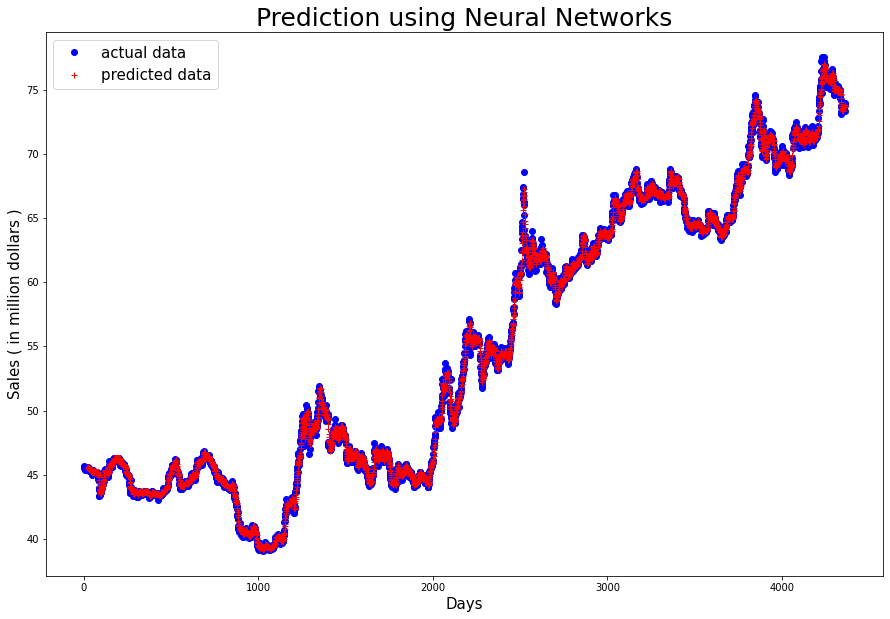

In [ ]:
actual_data_df = pd.Series(data['Close'], index= list(range( 0, len(data['Close']) )))
predicted_data_df = pd.Series(predicted_data, index = list(range( 20, len(data['Close']))))

plt.figure(figsize=(15,10))
plt.plot(list(range( 0, len(data['Close']) )), data['Close'], 'bo', label='actual data')
plt.plot(list(range( 20, len(data['Close']))) ,predicted_data, 'r+', label='predicted data')
plt.title('Prediction using Neural Networks', fontsize=25)
plt.legend(loc = 'upper left', fontsize=15)
plt.ylabel('Sales ( in million dollars )', fontsize=15)
plt.xlabel('Days', fontsize=15)
plt.show()

In [ ]:
print(predicted_data_df[-10:])
print(data['Close'][-10:])

In [ ]:
print(list(data['Date'][-10:]))

['2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01']
